In [1]:
from nrclex import NRCLex
from convokit import Corpus, download
import pandas as pd



In [2]:
# We need this to run the textBlob used by the NRCLex library
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /Users/Panos/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/Panos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Load the corpus and extract the conversation ids

In [3]:

def get_thread(corpus, conv_id):
    # Get the root utterance (main post)
    root_conversation = corpus.conversations[conv_id]
    
    # Loop through each utterance and collect necessary information
    thread_data = []
    for utt in root_conversation.iter_utterances():
        try:
            thread_data.append({
                'utterance_id': utt.id,
                'speaker'     : utt.speaker.id,
                'reply_to'    : utt.reply_to if utt.reply_to is not None 
                else utt.id,
                'timestamp'   : utt.timestamp if utt.timestamp is not None 
                else 0,
                'text'        : utt.text,
                'success'     : utt.meta['success'] if utt.meta['success'] 
                                                       is not None else -1 
            })
        except KeyError:
            continue
            
    
    # Create a DataFrame from the collected data and sort it
    df = pd.DataFrame(thread_data)
    df = df.sort_values(by='timestamp').reset_index(drop=True)
    
    return df

# Download the corpus
# corpus = Corpus(download("winning-args-corpus"))

# or load it from disk
corpus = Corpus("/Users/Panos/.convokit/downloads/winning-args-corpus")

# Get conversation ids
convos = [i.id for i in corpus.iter_conversations()]


### Choose conversation and build dataframe

In [4]:
#create a conversation thread
thread_df = get_thread(corpus, convos[0])
print(thread_df)

   utterance_id               speaker    reply_to   timestamp  \
0     t3_2ro9ux            seanyowens        None           0   
1    t1_cnhplrm           Account9726   t3_2ro9ux  1420697092   
2    t1_cnhpnmr            R3ptar1337   t3_2ro9ux  1420697175   
3    t1_cnhpp4o          BenIncognito   t3_2ro9ux  1420697241   
4    t1_cnhpsmr            seanyowens  t1_cnhplrm  1420697421   
5    t1_cnhpvqs           Account9726  t1_cnhpsmr  1420697567   
6    t1_cnhq330               Amablue   t3_2ro9ux  1420697904   
7    t1_cnhq7iw            seanyowens  t1_cnhpvqs  1420698102   
8    t1_cnhq7nv              nikoberg   t3_2ro9ux  1420698109   
9    t1_cnhqcwz                Nepene   t3_2ro9ux  1420698347   
10   t1_cnhqhxa             [deleted]  t1_cnhpnmr  1420698576   
11   t1_cnhqouu          whitepalms85  t1_cnhpp4o  1420698900   
12   t1_cnhqrw1                Nepene  t1_cnhq7iw  1420699040   
13   t1_cnhqzsf          whitepalms85  t1_cnhplrm  1420699399   
14   t1_cnhrd8u          

### Choose post and show text

In [77]:
text_object = NRCLex(text=thread_df["text"][0])
text = thread_df["text"][0]
print(text)

I can't remember the topic that spurred this discussion, but a friend and I were debating whether man-made things were natural. He took the position that they are unnatural. 

He cited this definition by Merriam-Webster:  existing in nature and not made or caused by people : coming from nature (http://www.merriam-webster.com/dictionary/natural) as his basis for the distinction for natural vs. unnatural.

However, I respectfully disagree with his position and furthermore that definition of natural. People arise from nature. Humankind's capacity to create, problem-solve, analyze, rationalize, and build also come from natural processes. How are the things we create unnatural? It is only through natural occurrences that we have this ability, why is it that we would give the credit of these things solely to man, as opposed to nature? We are not separate from nature, thus, how can any of our actions or creations be unnatural? If we were somehow separate from nature, I would understand the di

### Show the Lexicon words identified in the text and their corresponding emotions

In [6]:
text_object.affect_dict

{'discussion': ['positive'],
 'friend': ['joy', 'positive', 'trust'],
 'unnatural': ['disgust', 'fear', 'negative'],
 'coming': ['anticipation'],
 'distinction': ['positive'],
 'disagree': ['anger', 'negative'],
 'create': ['joy', 'positive'],
 'build': ['positive'],
 'ability': ['positive'],
 'credit': ['positive', 'trust'],
 'opposed': ['anger', 'fear', 'negative'],
 'love': ['joy', 'positive'],
 'arguments': ['anger'],
 'mistaken': ['fear', 'negative'],
 'argument': ['anger', 'negative'],
 'word': ['positive', 'trust'],
 'intended': ['anticipation', 'positive']}

### Measure the word count in the text

In [7]:
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords

def count_unique_words_nltk(text):
    # Tokenize the text
    words = word_tokenize(text.lower())
    # Remove punctuation and stopwords
    stop_words = set(stopwords.words('english')) 
    filtered_words = [word for word in words if word not in stop_words and word.isalpha()]  # isalpha() removes punctuation
    word_counts = Counter(filtered_words)
    return word_counts


unique_word_counts_nltk = dict(count_unique_words_nltk(text))
print(unique_word_counts_nltk.keys())

dict_keys(['ca', 'remember', 'topic', 'spurred', 'discussion', 'friend', 'debating', 'whether', 'things', 'natural', 'took', 'position', 'unnatural', 'cited', 'definition', 'existing', 'nature', 'made', 'caused', 'people', 'coming', 'http', 'basis', 'distinction', 'however', 'respectfully', 'disagree', 'furthermore', 'arise', 'humankind', 'capacity', 'create', 'analyze', 'rationalize', 'build', 'also', 'come', 'processes', 'occurrences', 'ability', 'would', 'give', 'credit', 'solely', 'man', 'opposed', 'separate', 'thus', 'actions', 'creations', 'somehow', 'understand', 'think', 'synonyms', 'means', 'seems', 'must', 'due', 'part', 'love', 'hear', 'arguments', 'view', 'changed', 'mistaken', 'logic', 'somewhere', 'along', 'line', 'edit', 'thanks', 'responses', 'lads', 'many', 'pointed', 'argument', 'depends', 'context', 'use', 'word', 'arguing', 'semantics', 'intended', 'meaning', 'behind'])


### Compare the word count in text against the word count in Lexicon

In [8]:
text_object.affect_dict.keys()

dict_keys(['discussion', 'friend', 'unnatural', 'coming', 'distinction', 'disagree', 'create', 'build', 'ability', 'credit', 'opposed', 'love', 'arguments', 'mistaken', 'argument', 'word', 'intended'])

In [114]:
ratio = len(text_object.affect_dict.keys())/len(unique_word_counts_nltk.keys())
print(f"Percentage of words both in RAW text and NRC: "
    f"{ratio*100}%")

Percentage of words both in RAW text and NRC: 20.0%


### Compare the feature vectors of the words from NRC to the RAW text words. 

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


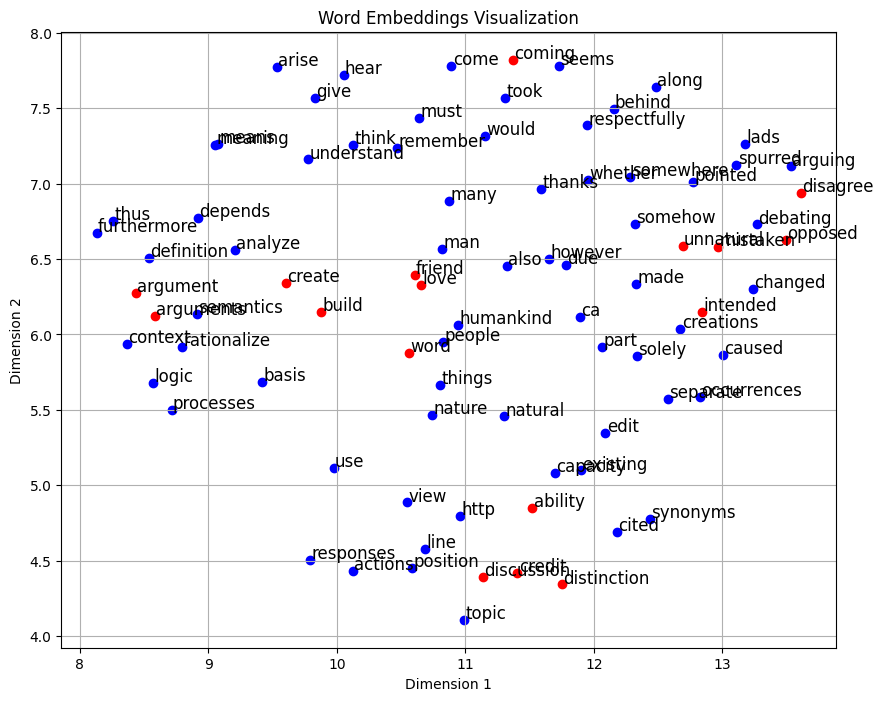

In [78]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from transformers import pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap
%matplotlib inline

# Load Hugging Face transformer model (BERT here) using pipeline
embedder = pipeline("feature-extraction", model="distilbert-base-uncased")

# Get the unique words using the NLTK function
unique_word_counts_nltk = count_unique_words_nltk(text)

# Extract the unique words (keys) from the Counter object
unique_words_raw = list(unique_word_counts_nltk.keys())
unique_words_nrc = list(text_object.affect_dict.keys())
unique_words = set(unique_words_raw)

# Get embeddings for each word using Hugging Face (DistilBERT in this case)
def get_word_embedding(word):
    # The model returns a list of lists, we take the first and average over token embeddings
    embedding = embedder(word)[0]
    word_vector = np.mean(embedding, axis=0)
    return word_vector

# Get embeddings for each word using spaCy
word_embeddings = np.array([get_word_embedding(word) for word in unique_words])

# Option 1: Use PCA to reduce the dimensions to 2D
pca = PCA(n_components=2)
word_embeddings_pca = pca.fit_transform(word_embeddings)

# Option 2: Use UMAP for dimensionality reduction
umap_reducer = umap.UMAP(n_components=2)
word_embeddings_umap = (umap_reducer.fit_transform(word_embeddings))

def word_in_all_lists(word, word_lists):
    return all(word in word_list for word_list in word_lists)

# Plotting the PCA result
def plot_embeddings(embeddings, words_list, colors_list=None):
    """
    Plots multiple sets of word embeddings on the same plot.

    Args:
        embeddings_list: List of embedding arrays (each array is for one set of words)
        words_list: List of lists, where each sublist contains words corresponding to the embeddings
        methods_list: List of method names (e.g., "PCA" or "UMAP") for each set
        colors_list: List of colors for each set (optional). If not provided, defaults will be used.
    """
    plt.figure(figsize=(10, 8))

    # Set default colors if not provided
    if colors_list is None:
        colors_list = ['blue', 'red', 'green', 'purple', 'orange'] 

    # Loop over each set of embeddings and plot
    for j, word in enumerate(set(sum(words_list,[]))):
        color = colors_list[0]
        if word_in_all_lists(word, words_list):
            color = colors_list[1]
        plt.scatter(embeddings[j, 0], embeddings[j, 1], marker='o', color=color)
        plt.text(embeddings[j, 0] + 0.01, embeddings[j, 1] + 0.01, word, fontsize=12)

    plt.title(f"Word Embeddings Visualization")
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.grid(True)
    plt.show()

plot_embeddings(word_embeddings_umap, [unique_words_raw, unique_words_nrc])